# Homework Session 7

### Sambanova

The meanings of the flags used are:

* --ntasks: Number of tasks run in parallel (number of MPI ranks started)

* --gres: Request generic resources (in this case rdu:8)

* --ntasks-per-node: Request that ntasks be invoked on each node

* --nodes: Total number of nodes in the job's resource allocation

* --cpus-per-task: Number of CPUs a task can use

I have run the bert example with values for --ntasks of 4, 8, 16, and 32 (reducing --cpus-per-task to 4 to adhere to the CPU limit of 128). The runtimes for all four test cases were surprisingly similar with 768 seconds, 788 seconds, 805 seconds, and 777 seconds, respectively. No clear trend can be observed. I would have expected runtime first to decrease with the number of parallel tasks, and then at some point to stagnate/slighlty increase again, because the gain from parallelization diminishes and communication between the nodes/waiting for other nodes to finish increases.

### Cerebras

I have run the bert example with batch sizes of 512, 1024, and 2048. The number of samples processed increased proportionally from 512,000 over 102,400 to 204,800, respectively. The run time, however, scaled degressively (175.18 seconds, 211.56 seconds, and 303.40 seconds, respectively).

### Groq

I have changed the file bert_tiny.py to customize the prompt (ignore that the prompt doesn't make sense in the context of the classification task):

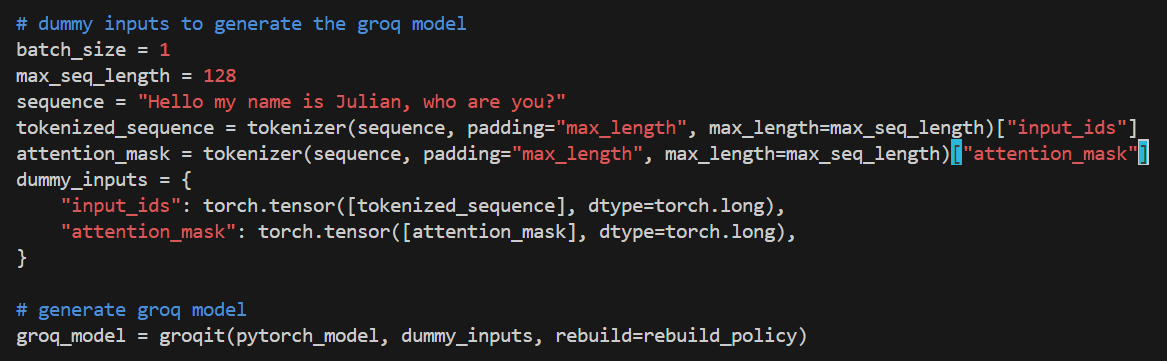

In [10]:
from PIL import Image
from IPython.display import display

img = Image.open('07_Screenshots/Changed_Input.png')
display(img)

However, upon execution of the file, an error message is thrown:

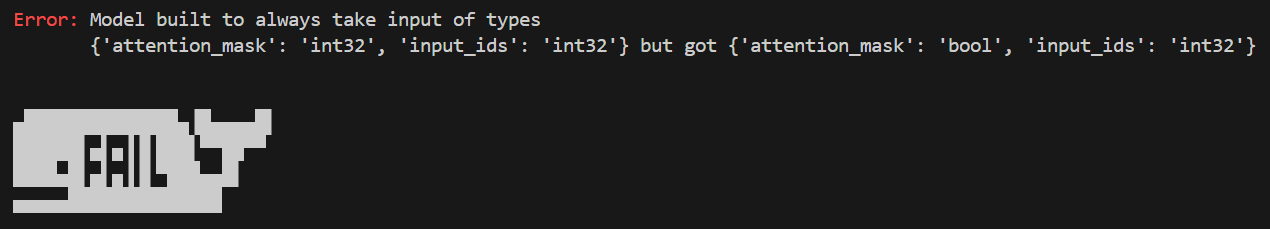

In [11]:
img = Image.open('07_Screenshots/Error_Message.png')
display(img)

I have checked the data type of the attention mask, and by the time it is passed to the model, it's data type is int64:

In [2]:
from transformers import BertTokenizer
import torch

2024-04-07 16:44:38.015515: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/soft/datascience/conda/2023-01-10/mconda3/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [4]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

max_seq_length=128
sequence = "Hello my name is Julian, who are you?"
tokenized_sequence = tokenizer(sequence, padding="max_length", max_length=max_seq_length)["input_ids"]
attention_mask = tokenizer(sequence, padding="max_length", max_length=max_seq_length)["attention_mask"]

In [ ]:
tf_seq = torch.tensor([tokenized_sequence], dtype=torch.long)
tf_mask = torch.tensor([attention_mask], dtype=torch.long)

print(tf_seq.dtype)
print(tf_mask.dtype)

torch.int64
torch.int64


Surprisingly, the model runs fine with the dummy data:

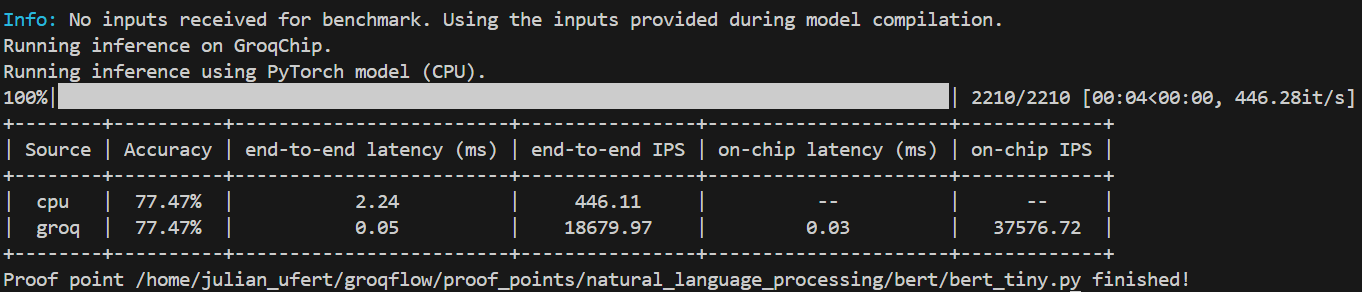

In [12]:
img = Image.open('07_Screenshots/Test_Run_With_Dummy.png')
display(img)

### Graphcore

I setup the virtual environment and environment variables, as well as cloned the git repo. However, over the past two days, I have not been able to run a job on Graphcore, because no resources are allocated to the job and it is just pending in the queue forever.